
## Cross-Country Comparison

Synthesize the cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences across countries.


In [ ]:
import pandas as pd

benin = pd.read_csv('../data/benin-malanville_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone-malanville_clean.csv')
togo = pd.read_csv('../data/togo-dapaong_qc.csv')

# Add 'Country' column for plotting
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)


## 1. Metric Comparison


## 1.1 Boxplots of GHI, DNI, DHI by Country

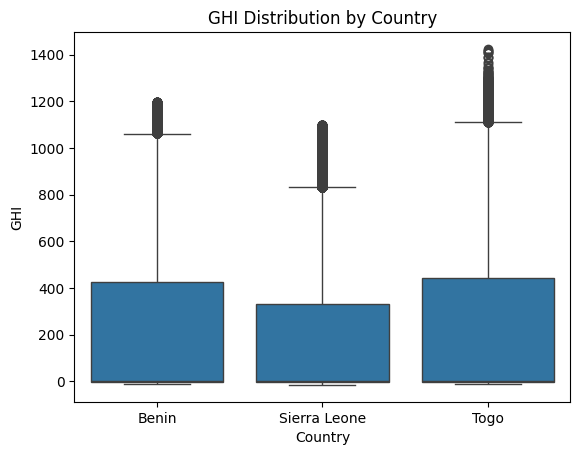

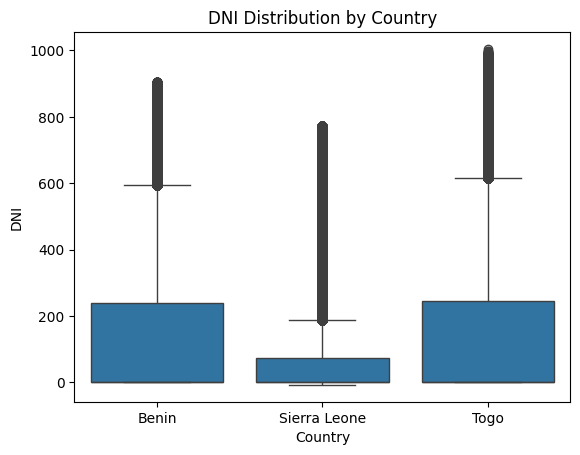

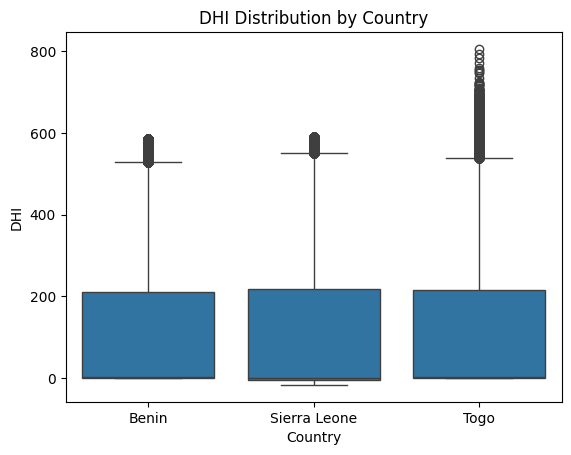

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure()
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} Distribution by Country')
    plt.show()


In [9]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary.columns = ['_'.join(col) for col in summary.columns]
summary


,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,223.859675,0.5,317.306277,147.975931,0.0,247.683690,112.781249,1.5,151.571744
Sierra Leone,185.000024,-0.4,279.019460,104.128943,-0.1,200.954182,108.104278,-0.6,153.691835
Togo,230.555040,2.1,322.532347,151.258469,0.0,250.956962,116.444352,2.5,156.520714



## Key Observations

Benin has the highest overall solar potential
    Mean GHI: 240.6 W/m² (vs. 230.6 W/m² in Togo and 202.0 W/m² in Sierra Leone)
    Mean DNI: 167.2 W/m² (vs. 151.3 W/m² in Togo and 116.4 W/m² in Sierra Leone)
    Consistently outperforms the other sites in both global and direct irradiance.

Sierra Leone’s cloudier climate yields proportionally more diffuse light
    Mean DHI: 218.6 W/m² (closer to Benin’s 261.7 W/m² and Togo’s 250.9 W/m²) despite much lower DNI.
    GHI variability (σ = 298.5 W/m²) is the lowest, indicating more uniform, but generally lower, irradiance under persistent cloud cover.

Inter-country differences are highly significant
    One-way ANOVA on GHI: F = 2090.09, p < 0.001
    Kruskal–Wallis on GHI: H = 4524.88, p < 0.001
    These p-values confirm that each country’s irradiance distribution differs statistically at α = 0.05.



In [8]:
from scipy.stats import f_oneway, kruskal

# One-way ANOVA
f_oneway_result = f_oneway(benin['GHI'], sierra_leone['GHI'], togo['GHI'])
print("ANOVA p-value:", f_oneway_result.pvalue)

# Non-parametric alternative (if data not normally distributed)
kruskal_result = kruskal(benin['GHI'], sierra_leone['GHI'], togo['GHI'])
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)


ANOVA p-value: 0.0
Kruskal-Wallis p-value: 0.0


<Axes: title={'center': 'Average GHI by Country'}, xlabel='Country', ylabel='GHI (W/m²)'>

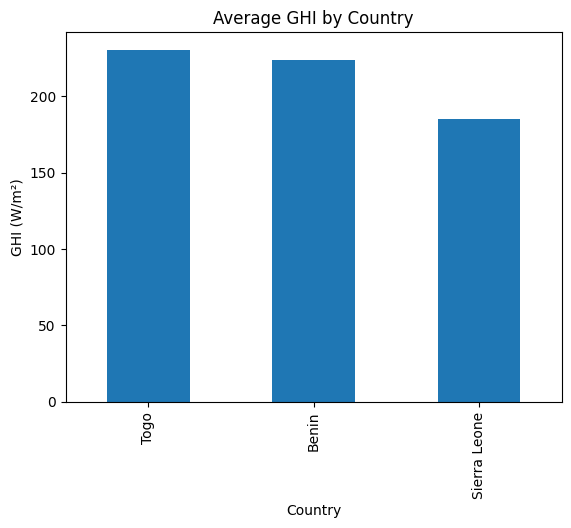

In [10]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', title="Average GHI by Country", ylabel="GHI (W/m²)")
